In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Customer Behavior Survey 2.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [4]:
demographic_df = df[
    [
        "age",
        "Gender",
        "Purchase_Categories",
        "Cart_Abandonment_Factors",
        "Add_to_Cart_Browsing",
        "Saveforlater_Frequency",
        "Cart_Completion_Frequency",
    ]
]

demographic_df.head()

,age,Gender,Purchase_Categories,Cart_Abandonment_Factors,Add_to_Cart_Browsing,Saveforlater_Frequency,Cart_Completion_Frequency
0,23,Female,Beauty and Personal Care,Found a better price elsewhere,Yes,Sometimes,Sometimes
1,23,Female,Clothing and Fashion,High shipping costs,Yes,Rarely,Often
2,24,Prefer not to say,Groceries and Gourmet Food;Clothing and Fashion,Found a better price elsewhere,Yes,Rarely,Sometimes
3,24,Female,Beauty and Personal Care;Clothing and Fashion;...,Found a better price elsewhere,Maybe,Sometimes,Sometimes
4,22,Female,Beauty and Personal Care;Clothing and Fashion,High shipping costs,Yes,Rarely,Sometimes


In [5]:
# this takes people who listed multiple purchase categories and
#   creates a row for them for each of their categories
# idk if this is the right way or one hot encoding

demo_df_exploded = demographic_df.assign(
    Purchase_Categories=demographic_df["Purchase_Categories"].str.split(";")
).explode("Purchase_Categories")
demo_df_exploded.head()

,age,Gender,Purchase_Categories,Cart_Abandonment_Factors,Add_to_Cart_Browsing,Saveforlater_Frequency,Cart_Completion_Frequency
0,23,Female,Beauty and Personal Care,Found a better price elsewhere,Yes,Sometimes,Sometimes
1,23,Female,Clothing and Fashion,High shipping costs,Yes,Rarely,Often
2,24,Prefer not to say,Groceries and Gourmet Food,Found a better price elsewhere,Yes,Rarely,Sometimes
2,24,Prefer not to say,Clothing and Fashion,Found a better price elsewhere,Yes,Rarely,Sometimes
3,24,Female,Beauty and Personal Care,Found a better price elsewhere,Maybe,Sometimes,Sometimes


In [6]:
demo_df_exploded["Cart_Completion_Frequency"].value_counts()

Cart_Completion_Frequency
Sometimes    549
Often        347
Rarely       120
Always       103
Never         39
Name: count, dtype: int64

In [7]:
# Convert cart_completion_frequency to ordinal scale (low values indicate higher abandonment)
cart_completion_map = {"Always": 1, "Often": 2, "Sometimes": 3, "Rarely": 4, "Never": 5}
demo_df_exploded["Cart_Abandonment_Score"] = df["Cart_Completion_Frequency"].map(
    cart_completion_map
)

demo_df_exploded.head()

,age,Gender,Purchase_Categories,Cart_Abandonment_Factors,Add_to_Cart_Browsing,Saveforlater_Frequency,Cart_Completion_Frequency,Cart_Abandonment_Score
0,23,Female,Beauty and Personal Care,Found a better price elsewhere,Yes,Sometimes,Sometimes,3
1,23,Female,Clothing and Fashion,High shipping costs,Yes,Rarely,Often,2
2,24,Prefer not to say,Groceries and Gourmet Food,Found a better price elsewhere,Yes,Rarely,Sometimes,3
2,24,Prefer not to say,Clothing and Fashion,Found a better price elsewhere,Yes,Rarely,Sometimes,3
3,24,Female,Beauty and Personal Care,Found a better price elsewhere,Maybe,Sometimes,Sometimes,3


In [8]:
# demo_df_exploded[demo_df_exploded["age"] < 18]

In [9]:
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65]
labels = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64"]
demo_df_exploded["Age_Group"] = pd.cut(
    demo_df_exploded["age"], bins=bins, labels=labels, right=False
)
demo_df_exploded["Age_Group"].value_counts()

Age_Group
25-34       385
18-24       382
35-44       197
45-54       130
55-64        34
Under 18     28
Name: count, dtype: int64

In [10]:
# Aggregate cart abandonment by age group, gender, and product category
# grouped = (
#     demo_df_exploded.groupby(["Age_Group", "Gender", "Purchase_Categories", "Add_to_Cart_Browsing", "Saveforlater_Frequency"])[
#         "Cart_Abandonment_Score"
#     ]
#     .mean()
#     .reset_index()
# )

# grouped

grouped = (
    demo_df_exploded.groupby(["Age_Group", "Gender", "Purchase_Categories"])
    .agg(
        Cart_Abandonment_Score=("Cart_Abandonment_Score", "mean"),
        Count=("age", "count"),
    )
    .reset_index()
)
grouped

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_92999/3280925803.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_df_exploded.groupby(["Age_Group", "Gender", "Purchase_Categories"])


,Age_Group,Gender,Purchase_Categories,Cart_Abandonment_Score,Count
0,Under 18,Female,Beauty and Personal Care,2.5,2
1,Under 18,Female,Clothing and Fashion,2.5,4
2,Under 18,Female,Groceries and Gourmet Food,NaN,0
3,Under 18,Female,Home and Kitchen,2.0,2
4,Under 18,Female,others,NaN,0
...,...,...,...,...,...
115,55-64,Prefer not to say,Beauty and Personal Care,3.0,2
116,55-64,Prefer not to say,Clothing and Fashion,3.0,1
117,55-64,Prefer not to say,Groceries and Gourmet Food,NaN,0
118,55-64,Prefer not to say,Home and Kitchen,3.0,1


In [11]:
grouped.sort_values(by="Cart_Abandonment_Score")

,Age_Group,Gender,Purchase_Categories,Cart_Abandonment_Score,Count
94,45-54,Others,others,1.000000,1
93,45-54,Others,Home and Kitchen,1.000000,1
92,45-54,Others,Groceries and Gourmet Food,1.000000,1
91,45-54,Others,Clothing and Fashion,1.000000,1
90,45-54,Others,Beauty and Personal Care,1.333333,3
...,...,...,...,...,...
110,55-64,Others,Beauty and Personal Care,NaN,0
111,55-64,Others,Clothing and Fashion,NaN,0
113,55-64,Others,Home and Kitchen,NaN,0
114,55-64,Others,others,NaN,0


### by age

In [83]:
cart_completion_map = {"Always": 1, "Often": 2, "Sometimes": 3, "Rarely": 4, "Never": 5}
demographic_df2 = demographic_df.copy()
demographic_df2["Cart_Abandonment_Score"] = demographic_df2[
    "Cart_Completion_Frequency"
].map(cart_completion_map)
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65]
labels = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64"]
demographic_df2["Age_Group"] = pd.cut(
    demographic_df2["age"], bins=bins, labels=labels, right=False
)
grouped2 = (
    demographic_df2.groupby(["Age_Group"])
    .agg(
        Cart_Abandonment_Score=("Cart_Abandonment_Score", "mean"),
        Count=("age", "count"),
    )
    .reset_index()
)

grouped2_highrate = grouped2[grouped2["Cart_Abandonment_Score"] >= 0]
# a score of 1 or 2 are those who say they rarely or never complete their cart
grouped2_highrate = grouped2_highrate[grouped2_highrate["Count"] >= 10]

grouped2_highrate.sort_values("Cart_Abandonment_Score")

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_92999/1897597440.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_df2.groupby(["Age_Group"])


,Age_Group,Cart_Abandonment_Score,Count
3,35-44,2.666667,84
2,25-34,2.703704,189
1,18-24,2.823009,226
0,Under 18,2.846154,13
4,45-54,2.871429,70
5,55-64,2.888889,18


In [84]:
demographic_df3 = demographic_df2.copy()
grouped3 = (
    demographic_df3.groupby(["Gender"])
    .agg(
        Cart_Abandonment_Score=("Cart_Abandonment_Score", "mean"),
        Count=("age", "count"),
    )
    .reset_index()
)

grouped3_highrate = grouped3[grouped3["Cart_Abandonment_Score"] >= 0]
# a score of 1 or 2 are those who say they rarely or never complete their cart
grouped3_highrate = grouped3_highrate[grouped3_highrate["Count"] >= 10]

grouped3_highrate.sort_values("Cart_Abandonment_Score")

,Gender,Cart_Abandonment_Score,Count
1,Male,2.718310,142
2,Others,2.736842,19
0,Female,2.769886,352
3,Prefer not to say,2.865169,89


In [58]:
demographic_df2["Cart_Abandonment_Score"].mean()

2.770764119601329

# grouped by age gender and category

In [71]:
grouped_highrate = grouped[grouped["Cart_Abandonment_Score"] >= 2.77]
# a score of 1 or 2 are those who say they rarely or never complete their cart
grouped_highrate = grouped_highrate[grouped_highrate["Count"] >= 10]
grouped_highrate.sort_values("Cart_Abandonment_Score", ascending=False)

,Age_Group,Gender,Purchase_Categories,Cart_Abandonment_Score,Count
29,18-24,Male,others,3.187500,16
24,18-24,Female,others,3.000000,27
80,45-54,Female,Beauty and Personal Care,3.000000,18
81,45-54,Female,Clothing and Fashion,3.000000,17
83,45-54,Female,Home and Kitchen,2.937500,16
36,18-24,Prefer not to say,Clothing and Fashion,2.850000,20
56,25-34,Prefer not to say,Clothing and Fashion,2.833333,18
23,18-24,Female,Home and Kitchen,2.829268,41
20,18-24,Female,Beauty and Personal Care,2.820000,100
55,25-34,Prefer not to say,Beauty and Personal Care,2.777778,18


In [40]:
demo_df_exploded["Cart_Abandonment_Score"].mean()

2.6934369602763386

# what is the product category with the highest cart abandonment?

In [45]:
demo_df_exploded.groupby("Purchase_Categories")["Cart_Abandonment_Score"].agg(
    ["mean", "median"]
)

,mean,median
Purchase_Categories,,
Beauty and Personal Care,2.676101,3.0
Clothing and Fashion,2.690962,3.0
Groceries and Gourmet Food,2.603604,3.0
Home and Kitchen,2.690909,3.0
others,2.795181,3.0


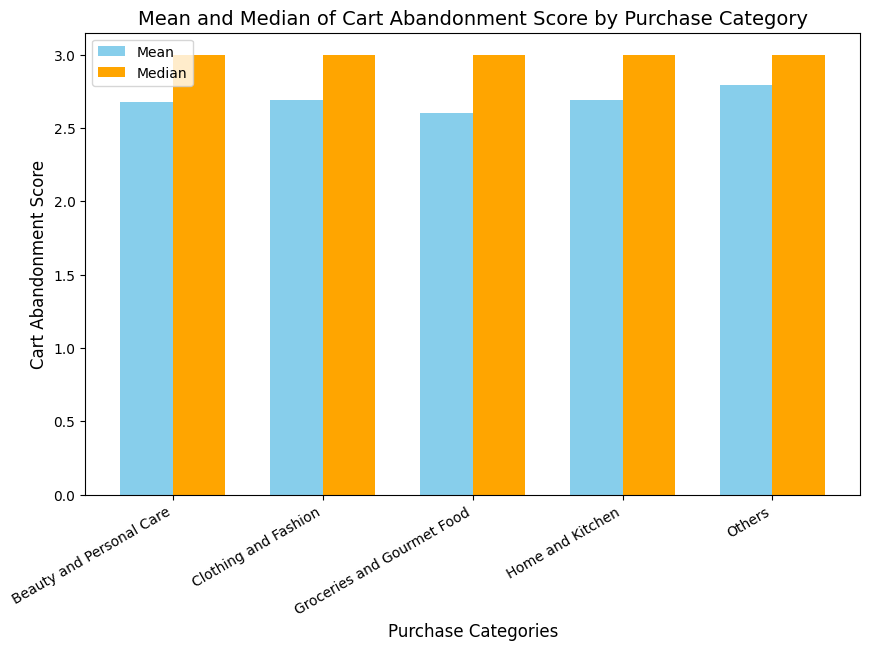

In [85]:
# Sample Data (Replace with your actual data)
categories = [
    "Beauty and Personal Care",
    "Clothing and Fashion",
    "Groceries and Gourmet Food",
    "Home and Kitchen",
    "Others",
]
means = [2.676, 2.691, 2.604, 2.691, 2.795]
medians = [3, 3, 3, 3, 3]

x = np.arange(len(categories))  # Category positions
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
ax.bar(x - width / 2, means, width, label="Mean", color="skyblue")
ax.bar(x + width / 2, medians, width, label="Median", color="orange")

# Labels, Titles, and Formatting
ax.set_xlabel("Purchase Categories", fontsize=12)
ax.set_ylabel("Cart Abandonment Score", fontsize=12)
ax.set_title(
    "Mean and Median of Cart Abandonment Score by Purchase Category", fontsize=14
)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=30, ha="right", fontsize=10)
ax.legend()

plt.show()

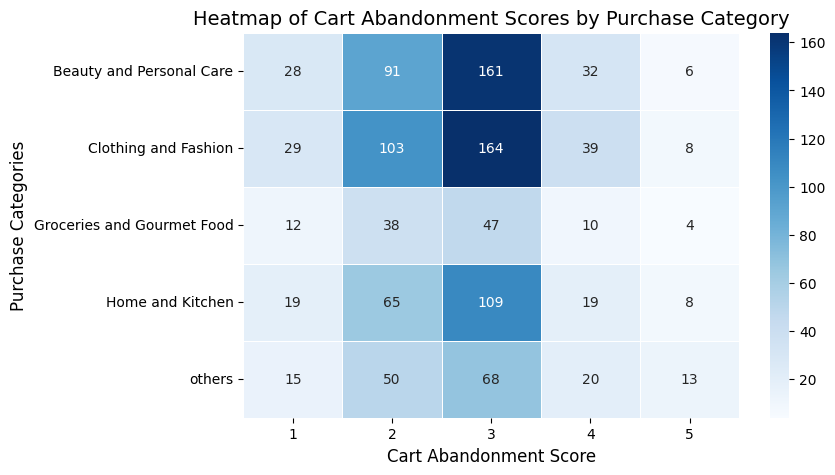

In [89]:
score_counts = (
    demo_df_exploded.groupby(["Purchase_Categories", "Cart_Abandonment_Score"])
    .size()
    .unstack(fill_value=0)
)


plt.figure(figsize=(8, 5))
sns.heatmap(score_counts, cmap="Blues", annot=True, fmt="d", linewidths=0.5)

plt.title("Heatmap of Cart Abandonment Scores by Purchase Category", fontsize=14)
plt.xlabel("Cart Abandonment Score", fontsize=12)
plt.ylabel("Purchase Categories", fontsize=12)

plt.show()

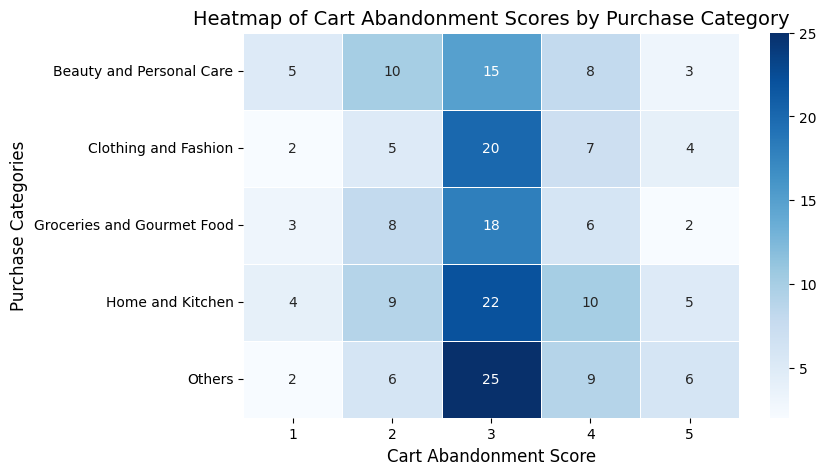

In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data (Replace with your actual data)
data = {
    "Purchase Category": [
        "Beauty and Personal Care",
        "Clothing and Fashion",
        "Groceries and Gourmet Food",
        "Home and Kitchen",
        "Others",
    ],
    1: [5, 2, 3, 4, 2],  # Count of responses with score 1
    2: [10, 5, 8, 9, 6],  # Count of responses with score 2
    3: [15, 20, 18, 22, 25],  # Count of responses with score 3
    4: [8, 7, 6, 10, 9],  # Count of responses with score 4
    5: [3, 4, 2, 5, 6],  # Count of responses with score 5
}

df = pd.DataFrame(data).set_index("Purchase Category")

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df, cmap="Blues", annot=True, fmt="d", linewidths=0.5)

plt.title("Heatmap of Cart Abandonment Scores by Purchase Category", fontsize=14)
plt.xlabel("Cart Abandonment Score", fontsize=12)
plt.ylabel("Purchase Categories", fontsize=12)

plt.show()

In [15]:
demo_df_exploded["Purchase_Categories"].value_counts()

Purchase_Categories
Clothing and Fashion          343
Beauty and Personal Care      318
Home and Kitchen              220
others                        166
Groceries and Gourmet Food    111
Name: count, dtype: int64

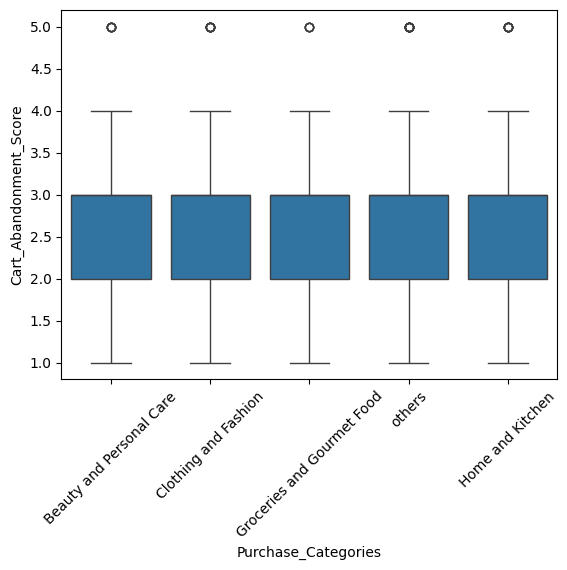

In [52]:
sns.boxplot(x="Purchase_Categories", y="Cart_Abandonment_Score", data=demo_df_exploded)

#
plt.xticks(rotation=45)

plt.show()

In [51]:
demo_df_exploded.groupby("Purchase_Categories")["Cart_Abandonment_Score"].describe()

# okay so doing a boxplot here is lowkey worthless lmao

,count,mean,std,min,25%,50%,75%,max
Purchase_Categories,,,,,,,,
Beauty and Personal Care,318.0,2.676101,0.843678,1.0,2.0,3.0,3.0,5.0
Clothing and Fashion,343.0,2.690962,0.867277,1.0,2.0,3.0,3.0,5.0
Groceries and Gourmet Food,111.0,2.603604,0.927159,1.0,2.0,3.0,3.0,5.0
Home and Kitchen,220.0,2.690909,0.883594,1.0,2.0,3.0,3.0,5.0
others,166.0,2.795181,1.029964,1.0,2.0,3.0,3.0,5.0


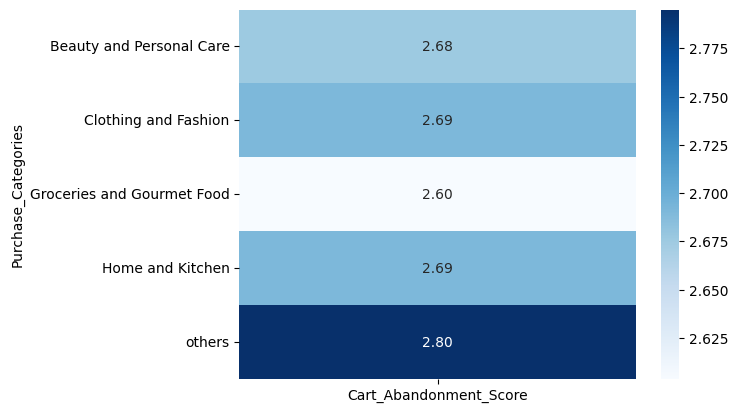

In [56]:
import seaborn as sns

# Create a pivot table and plot a heatmap
pivot = demo_df_exploded.pivot_table(
    values="Cart_Abandonment_Score", index="Purchase_Categories", aggfunc="mean"
)
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.show()

# which gender has higher cart abandonment?

In [16]:
demo_df_exploded.groupby("Gender")["Cart_Abandonment_Score"].agg(["mean", "median"])

,mean,median
Gender,,
Female,2.674208,3.0
Male,2.667808,3.0
Others,2.921053,3.0
Prefer not to say,2.763636,3.0


In [17]:
demo_df_exploded["Gender"].value_counts()

Gender
Female               663
Male                 292
Prefer not to say    165
Others                38
Name: count, dtype: int64

# which age group has highest cart abandonment?

In [18]:
demo_df_exploded.groupby("Age_Group")["Cart_Abandonment_Score"].agg(["mean", "median"])

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_92999/2448168141.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_df_exploded.groupby("Age_Group")["Cart_Abandonment_Score"].agg(["mean", "median"])


,mean,median
Age_Group,,
Under 18,2.857143,3.0
18-24,2.748691,3.0
25-34,2.615584,3.0
35-44,2.583756,3.0
45-54,2.876923,3.0
55-64,2.764706,3.0


# save to cart browsing?

In [19]:
demo_df_exploded.groupby("Add_to_Cart_Browsing")["Cart_Abandonment_Score"].agg(
    ["mean", "median"]
)

,mean,median
Add_to_Cart_Browsing,,
Maybe,2.905618,3.0
No,2.794118,3.0
Yes,2.417234,2.0


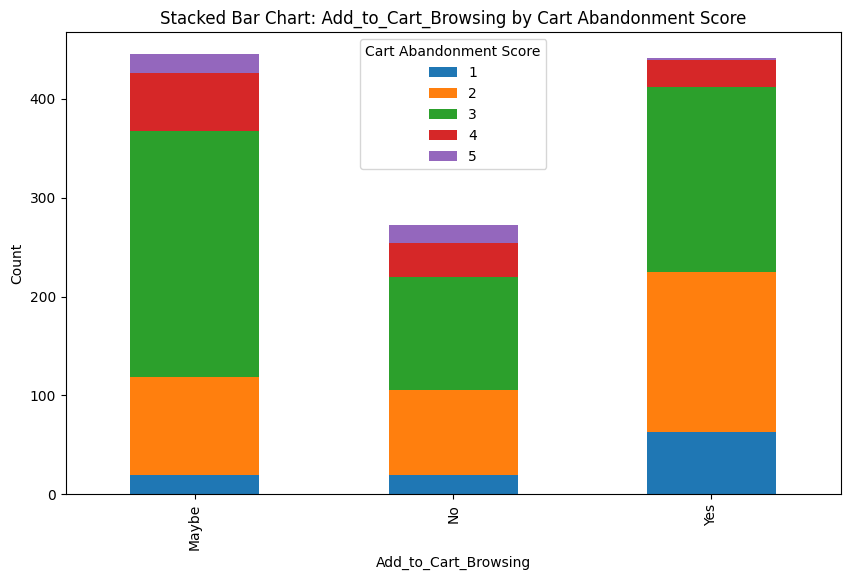

In [20]:
import matplotlib.pyplot as plt

# Pivot the data to get counts for each combination
stacked_data = (
    demo_df_exploded.groupby(["Add_to_Cart_Browsing", "Cart_Abandonment_Score"])
    .size()
    .unstack(fill_value=0)
)

# Plot a stacked bar chart
stacked_data.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Add_to_Cart_Browsing")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Add_to_Cart_Browsing by Cart Abandonment Score")
plt.legend(title="Cart Abandonment Score")
plt.show()

### interesting!

# save for later frequency?

In [21]:
demo_df_exploded.groupby("Saveforlater_Frequency")["Cart_Abandonment_Score"].agg(
    ["mean", "median"]
)

,mean,median
Saveforlater_Frequency,,
Always,2.365854,2.0
Never,3.132075,3.0
Often,2.397661,2.0
Rarely,2.930556,3.0
Sometimes,2.830700,3.0
